# Step-by-Step
1. Define the Project Objective
Task: Decide what you want to analyze or predict from the dataset. Example objectives:
- Sales trends over time.
- Product performance by category.
- Customer behavior analysis.
- Profit analysis based on discounts or shipping costs.
Action: Write down your objective clearly so that all your analysis aligns with it.

2. Load the Dataset
3. Data Cleaning and Preprocessing (Example: Handle missing values, Convert date columns to datetime format, Convert categorical columns to category type (for efficiency))
4. Exploratory Data Analysis (EDA) (nalyze the dataset to understand its structure, trends, and relationships.)
5. Build a Data Pipeline (Optional for Data Engineering Focus)
6. Data Storage (Store cleaned data in a database or as a clean file for future use. You could use a SQL database, NoSQL (MongoDB), or even a CSV file.)
7. Reporting and Visualization (Create reports or dashboards to communicate your findings)
8. Optional: Predictive Modeling (Use machine learning to predict future sales)
9. Deployment (Deploy your models or data pipeline)
10. Documentation and Final Report
11. Continuous Improvement

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("dataset1.csv")

In [49]:
df.head(10)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
5,2018-07-09,21:57:05,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card
6,2018-05-16,13:10:30,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card
7,2018-06-23,18:29:09,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card
8,2018-07-29,11:55:02,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card
9,2018-05-16,19:41:10,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order


# Define the Objective

What: Decide what you want to learn from the data.
Why: To focus your work and make it meaningful.

Objective: Understand how sales and profit change over time and by product type in the dataset.

We’ll check:
How much money (sales) is made each month.
Which products make the most profit.
If discounts affect profit.

In [50]:
df.info() # Shows column names and data types
# We have 16 Columns and 51290 Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

# Clean the Data

In [51]:
# Shows how many values are missing in each column
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [52]:
# Remove null value
df = df.dropna()

In [53]:
# Shows how many values are missing in each column
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

In [54]:
# Make Order_Date a date format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

You're telling pandas:
“These columns have repeated text values (like 'Male', 'Female', 'High', 'Low', etc.), so treat them as categories instead of normal text.”

Why do this?
- Saves memory: Categorical data uses less space than storing full strings.
- Faster operations: Comparisons and groupings become faster with category type.
- Better for analysis: It tells pandas that these values are from a fixed set of possible values.

This kind of memory savings becomes huge when working with big datasets or many repeated string columns like city names, product categories, etc.

In [55]:
# Make categorical columns efficient (like Gender, Product_Category)
df['Gender'] = df['Gender'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('category')
df['Order_Priority'] = df['Order_Priority'].astype('category')

In [56]:
print(df.duplicated().sum())  # Shows how many duplicate rows exist
# df = df.drop_duplicates()  # Removes duplicates

0


In [57]:
# Create Year and Month columns for easier analysis
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

In [58]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Year,Month
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018,1
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018,7
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018,11
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018,4
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018,8


In [59]:
# After Cleaning and processing
df.shape

# Before Cleaning we have: 16 Columns and 51290 Rows
# After Cleaning we have: 18 Columns and 51282 Rows

(51282, 18)

# Explore the Data (EDA)
What: Look at the data to find patterns.
Why: To understand sales trends and profit drivers.

In [60]:
print(df[['Sales', 'Profit', 'Discount', 'Shipping_Cost']].describe())

              Sales        Profit      Discount  Shipping_Cost
count  51282.000000  51282.000000  51282.000000   51282.000000
mean     152.337350     70.401796      0.303838       7.041166
std       66.492468     48.728131      0.131025       4.871685
min       33.000000      0.500000      0.100000       0.100000
25%       85.000000     24.900000      0.200000       2.500000
50%      133.000000     59.900000      0.300000       6.000000
75%      218.000000    118.400000      0.400000      11.800000
max      250.000000    167.500000      0.500000      16.800000


In [61]:
import matplotlib.pyplot as plt

In [85]:
# Sales by Month 
df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

Month
11    877881.0
5     824362.0
7     809974.0
12    767147.0
10    743137.0
9     738303.0
8     664245.0
6     642501.0
4     596990.0
3     435502.0
1     379627.0
2     332495.0
Name: Sales, dtype: float64

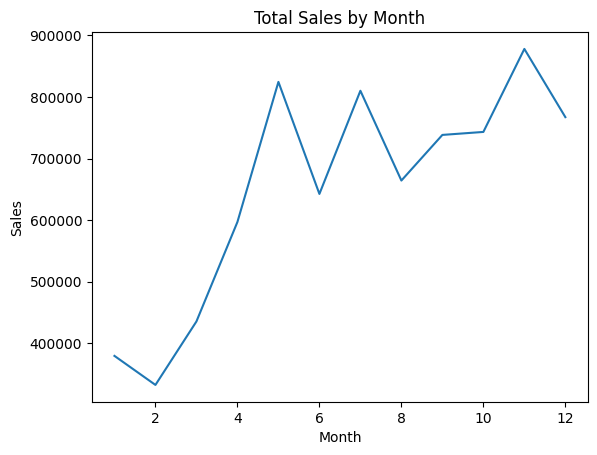

In [63]:
df.groupby('Month')['Sales'].sum().plot(kind='line')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# So what does observed do?

observed=False (default now, but will change):
- Includes all possible categories, even if they aren't in the data.
- So you might get a "Furniture" bar with zero profit in your chart.

observed=True (recommended for better performance):
- Only includes categories actually observed in the data.
- Ignores any unused categories, so your output is cleaner and faster.

In [64]:
df.groupby('Product_Category', observed=True)['Profit'].mean()

Product_Category
Auto & Accessories    64.488662
Electronic            64.491151
Fashion               80.816654
Home & Furniture      57.006018
Name: Profit, dtype: float64

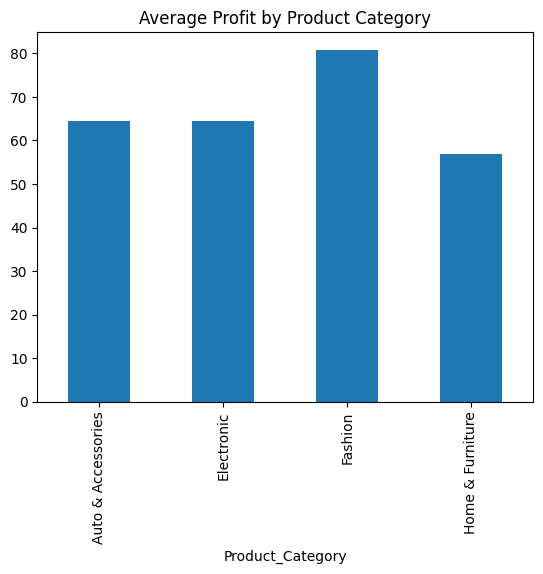

In [ ]:
df.groupby('Product_Category',  observed=True)['Profit'].mean().plot(kind='bar')
plt.title("Average Profit by Product Category")
# plt.savefig('Average_Profit.png')  # Saves the graph
plt.show()

In [67]:
import seaborn as sns

In [86]:
df.groupby('Discount')['Profit'].mean().reset_index()

,Discount,Profit
0,0.1,77.116417
1,0.2,68.273861
2,0.3,65.793952
3,0.4,71.297760
4,0.5,73.189754


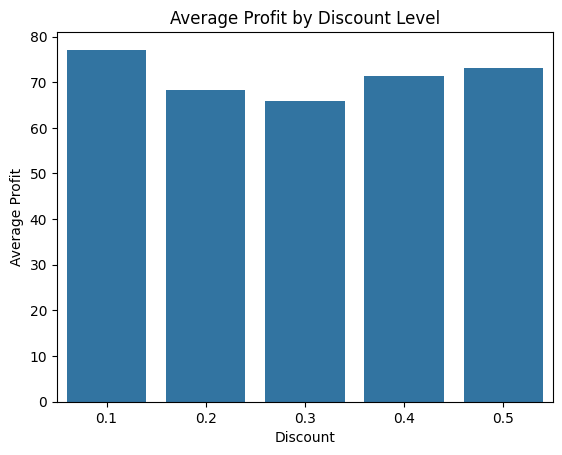

In [ ]:
# Group data by Discount and calculate average Profit
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

# Create a bar plot
sns.barplot(x='Discount', y='Profit', data=discount_profit)

# Add title and labels
plt.title('Average Profit by Discount Level')
# plt.savefig('Average_Profit_by_Discount_Level.png')  # Saves the graph
plt.xlabel('Discount')
plt.ylabel('Average Profit')

# Show the plot
plt.show()

# Store the Cleaned Data
What: Save the cleaned data in a database.
Why: A key data engineering skill is storing data for future use.

In [76]:
import sqlite3

In [77]:
conn = sqlite3.connect('sales_data.db')  # Creates a database file

In [78]:
df.to_sql('sales', conn, if_exists='replace', index=False)  # Saves data to a table
conn.close()

# Test the database

In [82]:
conn = sqlite3.connect('sales_data.db')
test_df = pd.read_sql('SELECT * FROM sales', conn)
test_df.head()  # Checks if data was saved correctly


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Year,Month
0,2018-01-02 00:00:00,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018,1
1,2018-07-24 00:00:00,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018,7
2,2018-11-08 00:00:00,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018,11
3,2018-04-18 00:00:00,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018,4
4,2018-08-13 00:00:00,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018,8


In [ ]:
conn.close() # Connect close

# Sales Report Summary

Objective:
Analyze sales and profit trends.

Findings:

1. Sales are highest in November.
2. Fashion Product has the highest profit.
3. Discounts above 0.2 reduce profit. (Profit starts decreasing noticeably after a 0.2 discount based on the data.)